In [227]:
#import the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [203]:
#print the columns with missing values and number of them

def missing_values(data):
    print('COLUMNS WITH MISSING VALUES: \n')

    for col in data.columns: #check each column of the training dataset
        if data[col].isnull().sum() != 0: #if there are missing values in that column
            print(f'{col}, {data[col].isnull().sum()}') #print the column name a                                                                         number of missing values

In [204]:
#some columns with missing values need to be fixed, because Nan indicates lack of a service instead of lack of the data

def fix_missing_values(data):
    data['Alley'].fillna('NoAlleyAccess', inplace = True)

    data['BsmtQual'].fillna('NoBasement', inplace = True)
    data['BsmtCond'].fillna('NoBasement', inplace = True)
    data['BsmtExposure'].fillna('NoBasement', inplace = True)
    data['BsmtFinType1'].fillna('NoBasement', inplace = True)
    data['BsmtFinType2'].fillna('NoBasement', inplace = True)

    data['FireplaceQu'].fillna('NoFireplace', inplace = True)

    data['GarageType'].fillna('NoGarage', inplace = True)
    data['GarageFinish'].fillna('NoGarage', inplace = True)
    data['GarageQual'].fillna('NoGarage', inplace = True)
    data['GarageCond'].fillna('NoGarage', inplace = True)

    data['PoolQC'].fillna('NoPool', inplace = True)

    data['Fence'].fillna('NoFence', inplace = True)

    data['MiscFeature'].fillna('None', inplace = True)

# Load the data

In [205]:
#load the training and testing datasets
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

#target variable
target = training_data['SalePrice']

#drop 'SalePrice' column in the training dataset
training_data.drop(columns = 'SalePrice', inplace = True)

#merge the training and testing datasets
data_merged = pd.concat([training_data, testing_data], axis = 0)

In [206]:
print(training_data.shape)
print(testing_data.shape)
print(data_merged.shape)

(1460, 80)
(1459, 80)
(2919, 80)


In [207]:
#info of the training dataset
data_merged.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  

# Treat the missing values

In [221]:
#check for missing values
missing_values(data_merged)

COLUMNS WITH MISSING VALUES: 

MSZoning, 4
LotFrontage, 486
Utilities, 2
Exterior1st, 1
Exterior2nd, 1
MasVnrType, 24
MasVnrArea, 23
BsmtFinSF1, 1
BsmtFinSF2, 1
BsmtUnfSF, 1
TotalBsmtSF, 1
Electrical, 1
BsmtFullBath, 2
BsmtHalfBath, 2
KitchenQual, 1
Functional, 2
GarageCars, 1
GarageArea, 1
SaleType, 1


In [222]:
#fix the missing values that indicate a lack of feature and not a data not available
fix_missing_values(data_merged)

#check for missing values
missing_values(data_merged)

COLUMNS WITH MISSING VALUES: 

MSZoning, 4
LotFrontage, 486
Utilities, 2
Exterior1st, 1
Exterior2nd, 1
MasVnrType, 24
MasVnrArea, 23
BsmtFinSF1, 1
BsmtFinSF2, 1
BsmtUnfSF, 1
TotalBsmtSF, 1
Electrical, 1
BsmtFullBath, 2
BsmtHalfBath, 2
KitchenQual, 1
Functional, 2
GarageCars, 1
GarageArea, 1
SaleType, 1


&lt;matplotlib.axes._subplots.AxesSubplot at 0x12aed8f10&gt;

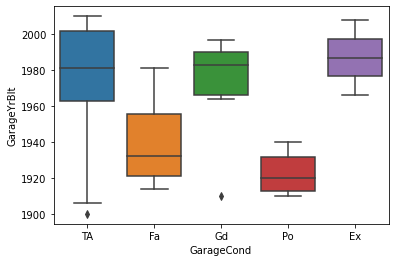

In [219]:
#Garage built more in the past are in worse condition
sns.boxplot(training_data['GarageCond'], training_data['GarageYrBlt'])

In [220]:
#remove 'GarageYrBlt' column, because if there is no garage no built year is available. In addition, we use the fact that a newer garage is reflected in a better condition. 
data_merged.drop(columns = 'GarageYrBlt', inplace = True)

In [224]:
data_merged.corrwith(data_merged['LotFrontage']).sort_values()

MSSubClass      -0.417359
OverallCond     -0.075508
Id              -0.027549
BsmtHalfBath    -0.025629
YrSold          -0.007917
KitchenAbvGr     0.004676
LowQualFinSF     0.004894
MoSold           0.011254
EnclosedPorch    0.011509
2ndFlrSF         0.026545
3SsnPorch        0.028289
HalfBath         0.039452
MiscVal          0.044272
BsmtFinSF2       0.047431
ScreenPorch      0.075858
YearRemodAdd     0.091557
BsmtFullBath     0.113245
BsmtUnfSF        0.113714
WoodDeckSF       0.122070
YearBuilt        0.122811
OpenPorchSF      0.164896
PoolArea         0.174119
FullBath         0.181668
OverallQual      0.217645
BsmtFinSF1       0.219408
MasVnrArea       0.221079
BedroomAbvGr     0.234892
Fireplaces       0.261970
GarageCars       0.310587
TotRmsAbvGrd     0.349513
TotalBsmtSF      0.354822
GarageArea       0.359786
GrLivArea        0.382462
1stFlrSF         0.458247
LotArea          0.489896
LotFrontage      1.000000
dtype: float64

[&lt;matplotlib.lines.Line2D at 0x12b0abe80&gt;]

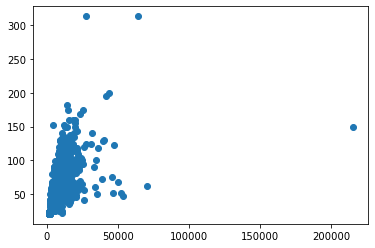

In [231]:
plt.plot(data_merged['LotArea'], data_merged['LotFrontage'], 'o')

[&lt;matplotlib.lines.Line2D at 0x12b63c760&gt;]

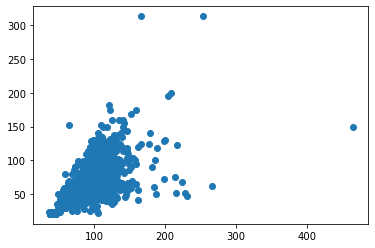

In [234]:
plt.plot(np.sqrt(data_merged['LotArea']), data_merged['LotFrontage'], 'o')